<a href="https://colab.research.google.com/github/g7mack/Machine-Learning-Engineering/blob/main/MLE_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MANE 4961: Machine Learning for Engineering HW 5**

Gavin MacKenzie: Solutions (662020762)

## 1)  Construct a convolutional neural network model for classifying the CIFAR-10 dataset. Use the test set of the CIFAR-10 dataset as validation data for the model. Implement the convolutional neural network architecture given below.
i. The first layer is a 2D convolutional layer with 64 filters, each of size (5, 5), and uses the ReLU activation function. The input shape of the layer should correspond to the dimensions of the input image.

ii. The second layer is a max pooling layer of size (2, 2).

iii. The third layer is another 2D convolutional layer with 32 filters, each of size (3, 3), and uses the ReLU activation function.

iv. The fourth layer is another max pooling layer of size (2, 2).

v. The fifth layer is another 2D convolutional layer with 32 filters, each of size (3, 3), and uses the ReLU activation function.

vi. The sixth layer is a flattened layer which converts the output of the previous layer into a one-dimensional vector.

vii. The seventh layer is a dense layer with 64 neurons and uses the ReLU activation function.

viii. The eighth and final layer produces estimated probabilities to classify the CIFAR-10 classes.

Calculate and plot the training and validation accuracies of the network
after 10 epochs with a batch size of 64.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 106ms/step - accuracy: 0.3016 - loss: 1.8835 - val_accuracy: 0.4988 - val_loss: 1.4045
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 106ms/step - accuracy: 0.5106 - loss: 1.3673 - val_accuracy: 0.5582 - val_loss: 1.2410
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 104ms/step - accuracy: 0.5640 - loss: 1.2322 - val_accuracy: 0.5805 - val_loss: 1.1741
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.5981 - loss: 1.1387 - val_accuracy: 0.6010 - val_loss: 1.1424
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 105ms/step - accuracy: 0.6285 - loss: 1.0567 - val_accuracy: 0.6149 - val_loss: 1.0911
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 108ms/step - accuracy: 0.6474 - loss: 1.0067 - val_accuracy: 0.6366 - val_loss: 1.0305
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.6710 - loss: 0.9416 - val_accuracy: 0.6498 - val_loss: 0.9988
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 106ms/step - accuracy: 0.6827 - loss: 0.9017 - va

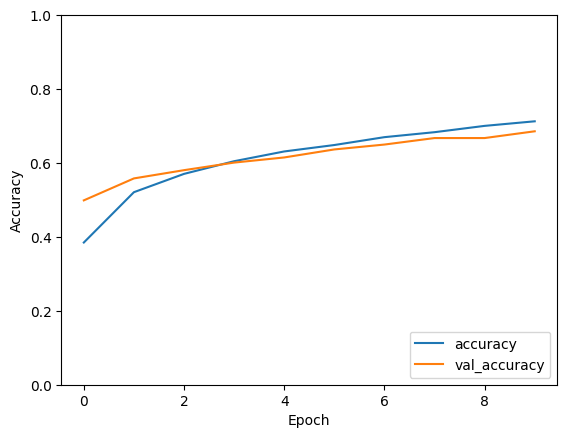

313/313 - 4s - 14ms/step - accuracy: 0.6857 - loss: 0.9264

Test accuracy: 0.685699999332428


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# create and train model
model = models.Sequential()

model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels), batch_size=64)

# plot accuracies
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

## 2) Use the Scikit-learn breast cancer Wisconsin dataset and support vector machine classifiers to classify breast cancers. You must use worst compactness, worst concavity, and worst area features only to perform the classification. What is the accuracy of the classification model with a linear kernel? What is the accuracy of the classification model with a radial basis function kernel with regularization strength parameter, C=2?

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

selected_features = ['worst compactness', 'worst concavity', 'worst area']
X_selected = X[selected_features]

# split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# train linear SVM model
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

print(f'Accuracy with Linear Kernel: {accuracy_linear:.4f}')

# train RBF SVM model
rbf_svm = SVC(kernel='rbf', C=2)
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f'Accuracy with Radial Basis Function Kernel (C=2): {accuracy_rbf:.4f}')

Accuracy with Linear Kernel: 0.9649
Accuracy with Radial Basis Function Kernel (C=2): 0.9474
